# CALIDAD DE DATOS

## IMPORTAR PAQUETES

In [8]:
import numpy as np
import pandas as pd
from janitor import clean_names

#Automcompletar rápido
%config IPCompleter.greedy=True

#Desactivar notación científica
pd.options.display.float_format = '{:,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [9]:
ruta_proyecto = '/Users/julian/Desktop/DS4B Mastery Course/EstructuraDirectorio/03_MACHINE_LEARNING/07_CASOS/CASO_ML3_SCORING_DE_RIESGOS/03_RIESGOS'

Sustituir el nombre_fichero_datos.

In [10]:
nombre_fichero_datos = 'trabajo.csv'

Cargar los datos.

In [11]:
ruta_completa = ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_fichero_datos

df = pd.read_csv(ruta_completa,index_col='id_cliente')
df

,Unnamed: 0,empleo,antigüedad_empleo,ingresos,ingresos_verificados,rating,dti,vivienda,num_hipotecas,num_lineas_credito,...,id_prestamo,descripcion,finalidad,principal,tipo_interes,num_cuotas,imp_cuota,imp_amortizado,estado,imp_recuperado
id_cliente,,,,,,,,,,,,,,,,,,,,,
137387967,0,Hvac technician,3 years,"54,000.00",Source Verified,A,19.31,MORTGAGE,2.00,10.00,...,NaN,NaN,debt_consolidation,"15,000.00",7.21,36 months,464.60,"2,669.06",Current,0.00
4798121,1,"Target Promotions and Marketing,Inc",10+ years,"65,000.00",Not Verified,D,25.40,RENT,1.00,15.00,...,NaN,NaN,debt_consolidation,"10,000.00",17.77,36 months,360.38,"6,362.96",Charged Off,0.00
46641215,2,Banker,5 years,"135,000.00",Verified,A,14.68,RENT,0.00,19.00,...,NaN,NaN,debt_consolidation,"24,000.00",6.39,36 months,734.38,"24,000.00",Fully Paid,0.00
87998444,3,executive director,9 years,"188,000.00",Source Verified,B,11.69,MORTGAGE,3.00,15.00,...,NaN,NaN,credit_card,"27,000.00",8.99,60 months,560.35,"12,443.00",Current,0.00
131289518,5,NaN,10+ years,"72,777.00",Source Verified,D,24.74,MORTGAGE,2.00,10.00,...,NaN,NaN,home_improvement,"25,000.00",21.85,60 months,688.35,"2,811.27",Current,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51876926,199995,Office Manager,10+ years,"42,000.00",Not Verified,C,20.85,MORTGAGE,6.00,9.00,...,NaN,NaN,debt_consolidation,"8,000.00",12.29,36 months,266.83,"8,000.00",Fully Paid,0.00
121031962,199996,Owner & President,6 years,"111,697.00",Verified,B,16.63,MORTGAGE,2.00,10.00,...,NaN,NaN,other,"10,000.00",9.44,36 months,320.05,"4,388.51",Current,0.00
135641397,199997,Sr. Field Engineer,10+ years,"285,000.00",Source Verified,D,6.02,MORTGAGE,3.00,9.00,...,NaN,NaN,small_business,"30,000.00",17.47,36 months,"1,076.62","5,387.53",Current,0.00


## VISIÓN GENERAL

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140000 entries, 137387967 to 94394801
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   140000 non-null  int64  
 1   empleo                       129727 non-null  object 
 2   antigüedad_empleo            130991 non-null  object 
 3   ingresos                     140000 non-null  float64
 4   ingresos_verificados         140000 non-null  object 
 5   rating                       140000 non-null  object 
 6   dti                          139906 non-null  float64
 7   vivienda                     140000 non-null  object 
 8   num_hipotecas                136946 non-null  float64
 9   num_lineas_credito           139998 non-null  float64
 10  porc_tarjetas_75p            135384 non-null  float64
 11  porc_uso_revolving           139894 non-null  float64
 12  num_cancelaciones_12meses    139991 non-null  float64

### Corrección

Eliminar la variable Unnamed: 0

In [13]:
df.drop(columns='Unnamed: 0',inplace=True)

## TIPOS DE DATOS

### Identificación

In [14]:
df.dtypes

empleo                          object
antigüedad_empleo               object
ingresos                       float64
ingresos_verificados            object
rating                          object
dti                            float64
vivienda                        object
num_hipotecas                  float64
num_lineas_credito             float64
porc_tarjetas_75p              float64
porc_uso_revolving             float64
num_cancelaciones_12meses      float64
num_derogatorios               float64
num_meses_desde_ult_retraso    float64
id_prestamo                    float64
descripcion                     object
finalidad                       object
principal                      float64
tipo_interes                   float64
num_cuotas                      object
imp_cuota                      float64
imp_amortizado                 float64
estado                          object
imp_recuperado                 float64
dtype: object

Conclusiones:

* Todo correcto en cuanto a tipo de datos

## VALORES ÚNICOS

### Identificación

In [15]:
df.nunique().sort_values()

id_prestamo                        0
num_cuotas                         2
ingresos_verificados               3
vivienda                           6
num_cancelaciones_12meses          7
rating                             7
estado                             9
antigüedad_empleo                 11
finalidad                         14
num_derogatorios                  17
num_hipotecas                     24
num_lineas_credito                65
num_meses_desde_ult_retraso      128
porc_tarjetas_75p                171
tipo_interes                     578
porc_uso_revolving              1092
principal                       1472
dti                             5306
descripcion                     7691
imp_recuperado                 10569
ingresos                       11646
imp_cuota                      33614
empleo                         54601
imp_amortizado                 57771
dtype: int64

Conclusiones:

* id_prestamo con menos de 2 valores --> eliminar

### Corrección

In [16]:
df.drop(columns = 'id_prestamo', inplace = True)

## DUPLICADOS

### Identificación

In [17]:
df.duplicated().sum()

0

## SEPARAR NUMÉRICAS Y CATEGÓRICAS

### Categóricas

In [18]:
cat = df.select_dtypes(exclude = 'number').copy()

### Numéricas

In [19]:
num = df.select_dtypes(include='number').copy()

## GESTIÓN DE CATEGÓRICAS

### Nulos

#### Identificación

In [20]:
cat.isna().sum().sort_values(ascending = False)

descripcion             132284
empleo                   10273
antigüedad_empleo         9009
ingresos_verificados         0
rating                       0
vivienda                     0
finalidad                    0
num_cuotas                   0
estado                       0
dtype: int64

In [21]:
cat.descripcion.value_counts(dropna=False)

descripcion
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     132284
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            14
  Borrower added on 06/26/13 >

In [22]:
cat.empleo.value_counts(dropna=False)

empleo
NaN                             10273
Teacher                          2433
Manager                          2171
Owner                            1355
Registered Nurse                 1002
                                ...  
Information Officer                 1
Production Tool & Technology        1
Allocation Planner                  1
Performance Engineer                1
Sr. Field Engineer                  1
Name: count, Length: 54602, dtype: int64

In [23]:
cat.antigüedad_empleo.value_counts(dropna=False)

antigüedad_empleo
10+ years    46119
2 years      12688
< 1 year     11660
3 years      11348
1 year        9165
NaN           9009
5 years       8699
4 years       8446
6 years       6373
7 years       5797
8 years       5744
9 years       4952
Name: count, dtype: int64

Conclusiones:

* sustituir todas por valor 'desconocido'

#### Corrección

##### Imputar por un valor

###### Variables a imputar

In [24]:
var_imputar_desconocido = ['descripcion','empleo','antigüedad_empleo']

###### Imputar

In [25]:
cat[var_imputar_desconocido] = cat[var_imputar_desconocido].fillna('desconocido')

## GESTIÓN DE NUMÉRICAS

### Nulos

#### Identificación

In [26]:
num.isna().sum().sort_values(ascending = False)

num_meses_desde_ult_retraso    71911
porc_tarjetas_75p               4616
num_hipotecas                   3054
porc_uso_revolving               106
dti                               94
num_cancelaciones_12meses          9
num_lineas_credito                 2
num_derogatorios                   2
ingresos                           0
principal                          0
tipo_interes                       0
imp_cuota                          0
imp_amortizado                     0
imp_recuperado                     0
dtype: int64

Veamoslas con más detalle.

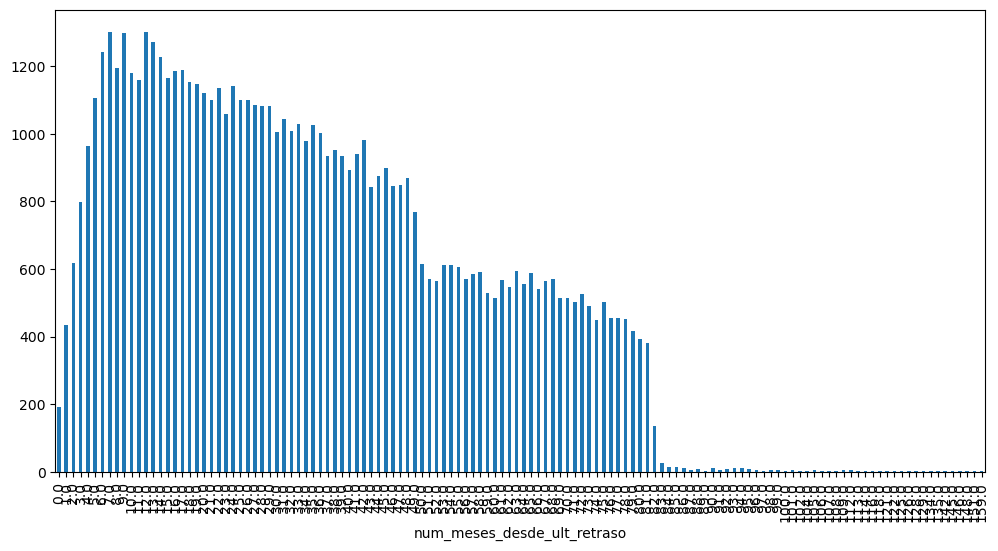

In [27]:
num.num_meses_desde_ult_retraso.value_counts().sort_index().plot.bar(figsize = (12,6));

Haya ceros, pero parecen pocos para una variable que implica retrasos.

Así que vamos a pensar que los nulos significan que no ha habido retrasos.

Y por tanto imputar por ceros.

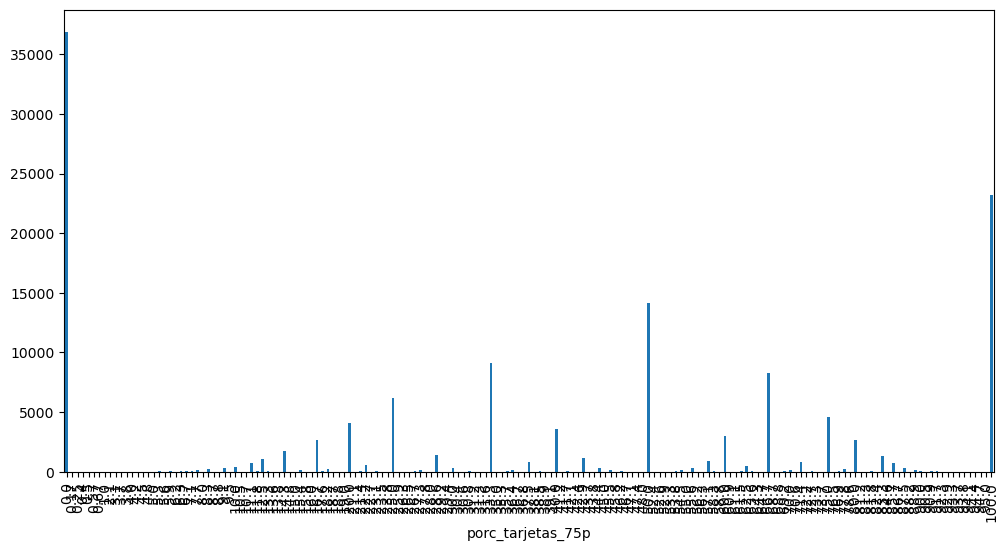

In [28]:
num.porc_tarjetas_75p.value_counts().sort_index().plot.bar(figsize = (12,6));

La categoría mayoritaria es cero.

Imputaremos por cero.

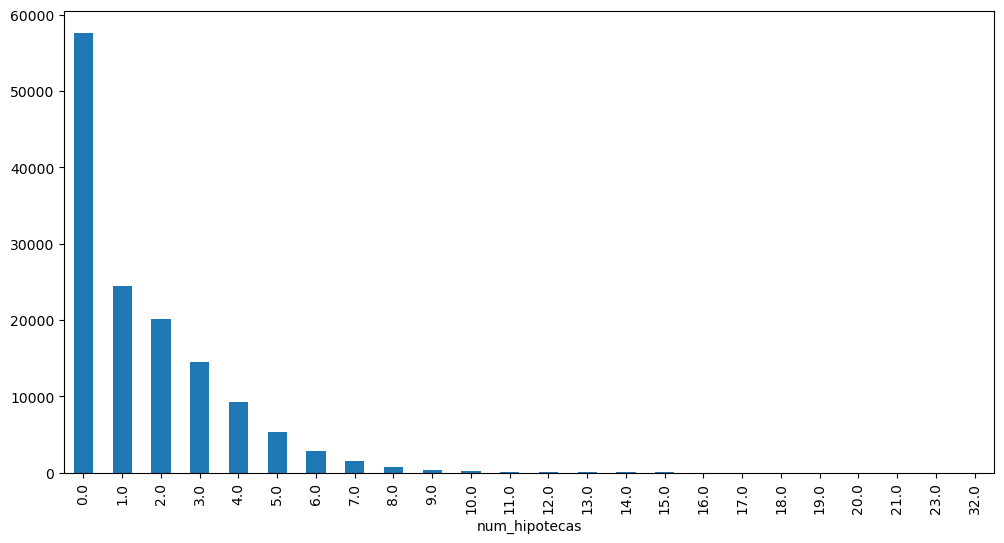

In [29]:
num.num_hipotecas.value_counts().sort_index().plot.bar(figsize = (12,6));

La categoría mayoritaria es cero.

Imputaremos por cero.

Conclusiones:

* imputar todas por ceros

#### Corrección

In [30]:
num.fillna(0,inplace=True)

### Atípicos

#### Por desviación típica

##### Identificación

###### Definir el número de desviaciones típicas

In [31]:
num_desv_tip = 4

###### Función que devuelve los índices de los atípicos

In [32]:
def atipicos_desv_tip(variable, num_desv_tip = 4):
    #sacamos los nulos por ahora
    variable = variable.dropna()
    #calculamos los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encontramos los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

###### Función que cuenta el número de atípicos

In [33]:
def conteo_atipicos(df,variable, num_desv_tip = 4):
    atipicos = atipicos_desv_tip(df[variable], num_desv_tip)
    return(df.loc[atipicos,variable].value_counts().sort_index())

###### Variables a aplicar

In [34]:
var_atipicos_dt = ['ingresos','principal','imp_cuota','imp_recuperado']

###### Aplicar

In [35]:
for variable in var_atipicos_dt:
    print('\n' + variable + ':\n')
    print(conteo_atipicos(num,variable,num_desv_tip))


ingresos:

ingresos
418,000.00        1
420,000.00       10
422,000.00        1
422,550.00        1
423,000.00        2
                 ..
6,702,150.00      1
8,500,000.00      1
9,550,000.00      1
9,573,072.00      1
10,999,200.00     1
Name: count, Length: 151, dtype: int64

principal:

Series([], Name: count, dtype: int64)

imp_cuota:

imp_cuota
1,535.71    1
1,566.80    2
1,587.02    1
1,714.54    1
Name: count, dtype: int64

imp_recuperado:

imp_recuperado
3,224.28     1
3,226.28     1
3,227.43     1
3,228.09     1
3,228.60     1
            ..
26,172.99    1
27,478.64    1
27,657.68    1
33,407.16    1
33,666.34    1
Name: count, Length: 1558, dtype: int64


Revisamos con más detalle la variable ingresos.

In [36]:
num.ingresos.describe()

count      140,000.00
mean        78,298.40
std         84,326.20
min              0.00
25%         46,249.25
50%         65,000.00
75%         93,561.00
max     10,999,200.00
Name: ingresos, dtype: float64

##### Corrección

Eliminar los registros con ingresos superiores a 300.000$

*Cuidado: Si se eliminan registros hay que eliminarlos tanto de cat como de num*

###### Id de registros a eliminar

In [37]:
a_eliminar = num.loc[num.ingresos > 300000].index.values
a_eliminar

array([ 97629676, 115087816,  30115373,  58654033,  96702950,  83678168,
        57316403,  75468055, 104953803,  55380417,  68355962,  60525500,
        59101444,  74703269,  70631462,  26329813, 121891976,    458760,
       145133997, 141509839,  99967449,  70701688, 113905376,  69967314,
        69127903,  79015002,  33371205, 114793732,   9746316, 110905405,
        89794872,  75358546,  65038134,  70592833, 104959821, 107733336,
        93092543,    489907, 122689487,  57074442, 133401013,  40942257,
        79492925,  78419419, 141591423,  67427919,  92659557, 138925364,
       102523636, 128067879, 125219862,  88921166, 109743090,    225812,
       131383380, 109322909, 141468030, 137347897,  53252537,  60873988,
        12938159, 107355068, 120217704, 104110402,  65795964,  59242936,
       125737574, 132251779, 134479546, 145242693,   2367546,    620850,
       120150582,  74585468, 143147174, 105895840, 125330617, 122347658,
       140598256,   3643552, 103337282,   1533286, 

###### Aplicar

In [38]:
cat = cat[~cat.index.isin(a_eliminar)]
num = num[~num.index.isin(a_eliminar)]

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en df, cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

### Definir los nombres de los archivos

In [39]:
ruta_trabajo = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'trabajo_resultado_calidad.pickle'
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_calidad.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_calidad.pickle'

### Guardar los archivos

In [40]:
df.to_pickle(ruta_trabajo)
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)